## Project overview, Why we analyze churn and questions to answer.

## Imports + load

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

RAW_PATH = "../data/raw/telco_secret.csv"
df = pd.read_csv(RAW_PATH)
pd.options.display.max_columns = None
print("Loaded:", RAW_PATH)
df.shape

Loaded: ../data/raw/telco_secret.csv


(3000, 18)

## Quick head & basic checks

In [2]:
df.head()

,customerID,gender,senior_citizen,dependents,tenure,contract,internet_service,online_security,tech_support,streaming_tv,monthly_charges,total_charges,payment_method,app_usage_min_per_week,complaint_count_6m,satisfaction_rating,engagement_score,churn
0,CUST00001,Female,1,No,52,One year,Fiber optic,No,No,Yes,114.00,5932.80,Credit card (automatic),492,0,1,0.551,Yes
1,CUST00002,Male,0,Yes,46,Month-to-month,DSL,Yes,No,Yes,137.98,6350.44,Mailed check,497,0,6,0.733,No
2,CUST00003,Male,0,Yes,53,Month-to-month,DSL,Yes,Yes,No,51.29,2721.75,Bank transfer (automatic),358,2,5,0.546,No
3,CUST00004,Female,0,Yes,18,One year,Fiber optic,No,No,Yes,112.47,2025.34,Mailed check,486,0,5,0.686,No
4,CUST00005,Female,0,Yes,42,Month-to-month,Fiber optic,Yes,Yes,Yes,63.84,2718.73,Mailed check,486,4,1,0.451,Yes


## Missing / dtypes / duplicates check

In [3]:
print("Missing values:\n", df.isnull().sum())
print("\nDtypes:\n", df.dtypes)
print("\nDuplicates:", df.duplicated().sum())

Missing values:
 customerID                0
gender                    0
senior_citizen            0
dependents                0
tenure                    0
contract                  0
internet_service          0
online_security           0
tech_support              0
streaming_tv              0
monthly_charges           0
total_charges             0
payment_method            0
app_usage_min_per_week    0
complaint_count_6m        0
satisfaction_rating       0
engagement_score          0
churn                     0
dtype: int64

Dtypes:
 customerID                 object
gender                     object
senior_citizen              int64
dependents                 object
tenure                      int64
contract                   object
internet_service           object
online_security            object
tech_support               object
streaming_tv               object
monthly_charges           float64
total_charges             float64
payment_method             object
app_usage_min_

## Basic cleaning notes (example: ensure numeric columns correct)

In [4]:
# If TotalCharges string -> convert (example placeholder)
if df['total_charges'].dtype == object:
    # try to coerce to numeric; errors -> NaN
    df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

# Fill simple missing numeric with median - document choices
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
for c in num_cols:
    if df[c].isnull().sum() > 0:
        df[c].fillna(df[c].median(), inplace=True)

# keep snapshot
df_clean = df.copy()
print("After basic cleaning, missing counts:", df_clean.isnull().sum().sum())

After basic cleaning, missing counts: 0


## Feature engineering quick (tenure bucket, charge bins)

In [5]:
df_clean['tenure_bucket'] = pd.cut(df_clean['tenure'],
                                   bins=[-1,6,24,48,100],
                                   labels=['0-6','7-24','25-48','49+'])
df_clean['monthly_charges_bin'] = pd.qcut(df_clean['monthly_charges'], q=4,
                                          labels=['Low','Med-Low','Med-High','High'])
df_clean['churn_flag'] = (df_clean['churn'] == 'Yes').astype(int)
df_clean.head()

,customerID,gender,senior_citizen,dependents,tenure,contract,internet_service,online_security,tech_support,streaming_tv,monthly_charges,total_charges,payment_method,app_usage_min_per_week,complaint_count_6m,satisfaction_rating,engagement_score,churn,tenure_bucket,monthly_charges_bin,churn_flag
0,CUST00001,Female,1,No,52,One year,Fiber optic,No,No,Yes,114.00,5932.80,Credit card (automatic),492,0,1,0.551,Yes,49+,Med-High,1
1,CUST00002,Male,0,Yes,46,Month-to-month,DSL,Yes,No,Yes,137.98,6350.44,Mailed check,497,0,6,0.733,No,25-48,High,0
2,CUST00003,Male,0,Yes,53,Month-to-month,DSL,Yes,Yes,No,51.29,2721.75,Bank transfer (automatic),358,2,5,0.546,No,49+,Med-Low,0
3,CUST00004,Female,0,Yes,18,One year,Fiber optic,No,No,Yes,112.47,2025.34,Mailed check,486,0,5,0.686,No,7-24,Med-High,0
4,CUST00005,Female,0,Yes,42,Month-to-month,Fiber optic,Yes,Yes,Yes,63.84,2718.73,Mailed check,486,4,1,0.451,Yes,25-48,Med-Low,1


## EDA plots (and save to assets/eda/)

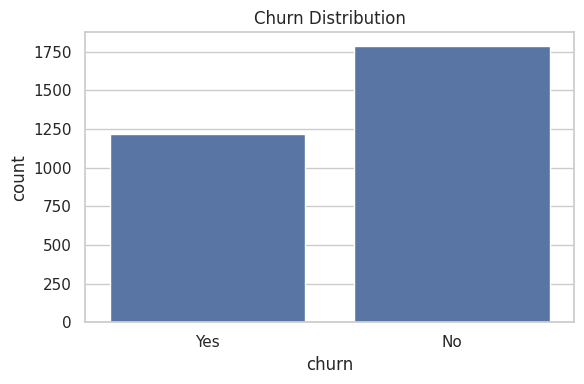

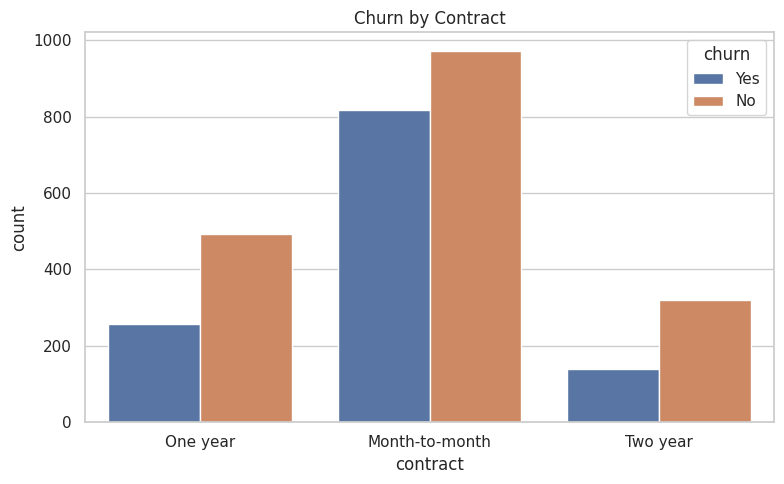

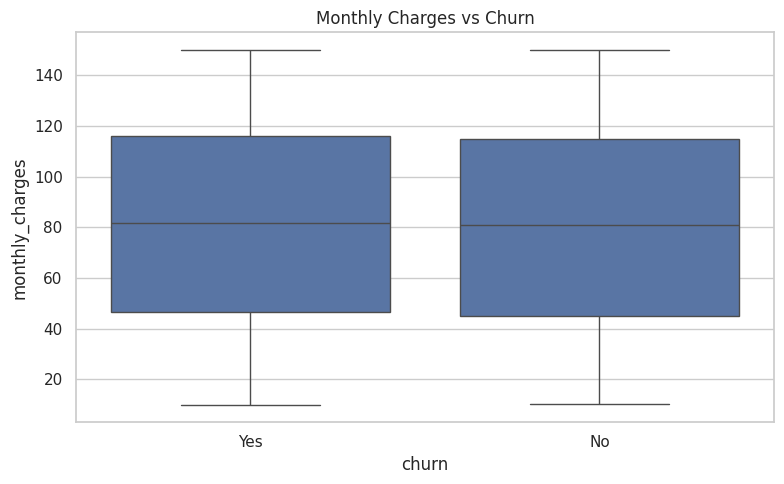

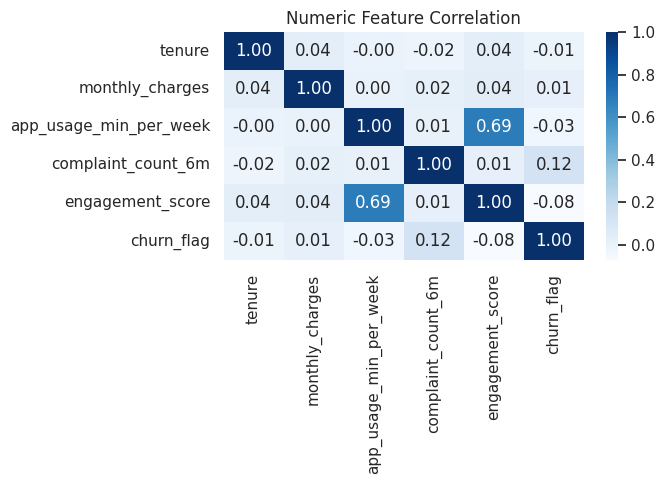

In [6]:
out_dir = "../assets/eda"
os.makedirs(out_dir, exist_ok=True)

# churn distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_clean, x='churn')
plt.title('Churn Distribution')
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "01_churn_distribution.png"))
plt.show()

# churn by contract
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_clean, x='contract', hue='churn')
plt.title('Churn by Contract')
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "02_churn_by_contract.png"))
plt.show()

# monthly charges vs churn boxplot
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=df_clean, x='churn', y='monthly_charges')
plt.title('Monthly Charges vs Churn')
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "03_monthly_charges_boxplot.png"))
plt.show()

# correlation heatmap (numeric)
plt.figure(figsize=(7,5))
num_df = df_clean[['tenure','monthly_charges','app_usage_min_per_week','complaint_count_6m','engagement_score','churn_flag']]
corr = num_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title('Numeric Feature Correlation')
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "04_correlation_heatmap.png"))
plt.show()

## Persona quick view (counts)

In [7]:
if 'persona' in df_clean.columns:
    display(df_clean['persona'].value_counts())
else:
    print("No persona column yet. Persona creation happens in feature-engineering step.")

No persona column yet. Persona creation happens in feature-engineering step.


## SAVE processed snapshot from EDA step

In [8]:
os.makedirs("../data/processed", exist_ok=True)
save_path = "../data/processed/01_after_eda.csv"
df_clean.to_csv(save_path, index=False)
print("✅ Saved EDA snapshot to", save_path)

✅ Saved EDA snapshot to ../data/processed/01_after_eda.csv
